In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kraggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/kraggle/test1.zip
/content/drive/MyDrive/kraggle/train.zip
/content/drive/MyDrive/kraggle/sampleSubmission.csv


In [ ]:
# Commented out IPython magic to ensure Python compatibility.
#import libraries

import zipfile
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tqdm import tqdm
import shutil
from keras.preprocessing.image import ImageDataGenerator





In [ ]:
zip_files = glob.glob('/content/drive/MyDrive/kraggle/*.zip')

print('{} files found in the input directory'.format(str(len(zip_files))) +'\n')
for file in zip_files:
    with zipfile.ZipFile(file, 'r') as Z:
        Z.extractall('data')
    print ('{} is extracted'.format(file.split('/')[-1]) + '\n')

print('Extraction is completed' + '\n')

2 files found in the input directory

test1.zip is extracted

train.zip is extracted

Extraction is completed



In [ ]:
# Specify the folder to be deleted and recreated
folder_path = '/kaggle/working/'

# Delete the folder if it exists
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
# Recreate the folder
os.makedirs(folder_path)


In [ ]:
path_train_zip  = '/content/drive/MyDrive/kraggle/train.zip'
path_test_zip  = '/content/drive/MyDrive/kraggle/test1.zip'
path_train_target  = '/kaggle/working/'
path_test_target  = '/kaggle/working/'

In [ ]:
with zipfile.ZipFile(path_test_zip,'r') as zip_loc:
    zip_loc.extractall(path_test_target)
with zipfile.ZipFile(path_train_zip,'r') as zip_loc:
    zip_loc.extractall(path_train_target)

In [ ]:
file_test = os.listdir('/kaggle/working/test1')
len(file_test)

12500

In [ ]:
file_train = os.listdir('/kaggle/working/train')
len(file_train)

25000

In [ ]:
dir_cat = os.path.join(path_train_target, 'train', 'cat')
dir_dog = os.path.join(path_train_target, 'train', 'dog')


In [ ]:
os.makedirs(dir_cat, exist_ok=True)
os.makedirs(dir_dog, exist_ok=True)

In [ ]:
dir_image = os.path.join(path_train_target, 'train')

for filename in os.listdir(dir_image):
    if filename.startswith('cat.'):
        src = os.path.join(dir_image, filename)
        dst = os.path.join(dir_cat, filename)
        os.rename(src, dst)
    elif filename.startswith('dog.'):
        src = os.path.join(dir_image, filename)
        dst = os.path.join(dir_dog, filename)
        os.rename(src, dst)

In [ ]:
file_train_cat = os.listdir('/kaggle/working/train/cat')
len(file_train_cat)

12500

In [ ]:
file_train_dog = os.listdir('/kaggle/working/train/dog')
len(file_train_dog)

12500

In [ ]:
file_train = os.listdir('/kaggle/working/train')
len(file_train)

2

In [ ]:
#how many img I want to keep from 12500
folder_path = '/kaggle/working/train/dog'
threshold = 2000

file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.startswith('dog.') and int(file_name.split('.')[1]) >= threshold:
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)

In [ ]:
file_train_dog = os.listdir('/kaggle/working/train/dog')
len(file_train_dog)

2000

In [ ]:
folder_path = '/kaggle/working/train/cat'
threshold = 2000

file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.startswith('cat.') and int(file_name.split('.')[1]) >= threshold:
        file_path = os.path.join(folder_path, file_name)
        os.remove(file_path)

In [ ]:
file_train_cat = os.listdir('/kaggle/working/train/cat')
len(file_train_cat)

2000

In [ ]:
DATADIR = '/kaggle/working/train'
CATEGORIES = ['cat','dog']
IMG_SIZE = 100

file_test = os.listdir(DATADIR)
print(len(file_test))
# for file_name in file_test:
#     print(file_name)


2


In [ ]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        # plt.imshow(img_array)
        # plt.show()
        break
    break


In [ ]:
training_data=[]
def createe_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
createe_training_data()

# Initialize an empty list for training data
# training_data = []

#Function to create training data with data augmentation
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])

                # Data augmentation
                datagen = ImageDataGenerator(
                    rotation_range=60,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    brightness_range=(0.5, 1.5))

                for batch in datagen.flow(img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3), batch_size=1):
                    augmented_image = batch.reshape((IMG_SIZE, IMG_SIZE, 3))
                    training_data.append([augmented_image, class_num])
                    break
            except Exception as e:
                pass

create_training_data()
print("Total training samples:", len(training_data))



Total training samples: 8000


In [ ]:
lenofimage = len(training_data)

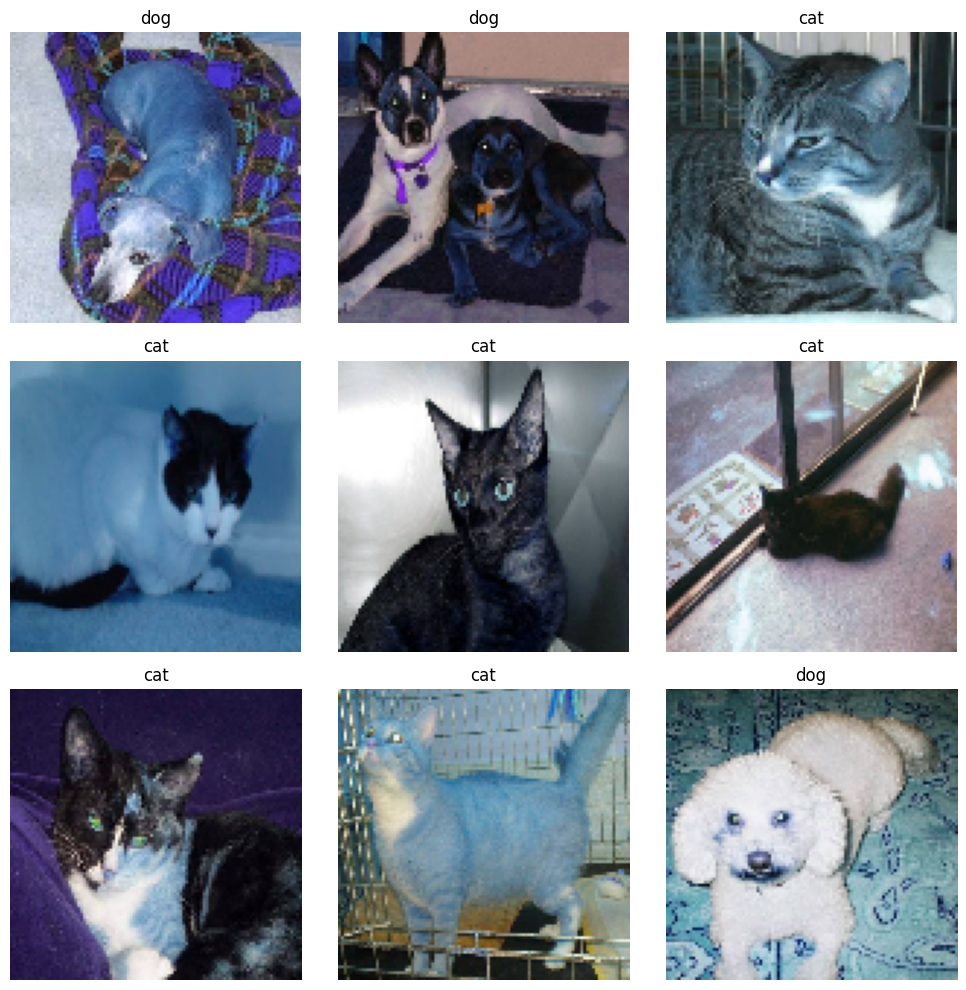

In [ ]:
import random

# Function to display augmented images
def display_augmented_images():
    plt.figure(figsize=(10, 10))
    random.shuffle(training_data)
    for i in range(9):
        img_array, class_num = training_data[i]
        plt.subplot(3, 3, i+1)
        plt.imshow(img_array)
        plt.title(CATEGORIES[class_num])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to display augmented images
display_augmented_images()

In [ ]:
# # Shuffle the training data
# np.random.shuffle(training_data)

In [ ]:
#2D
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)



In [ ]:
X.shape

(8000, 30000)

In [ ]:
#flattening the array
X = X/255.0

In [ ]:
y=np.array(y)
y.shape

(8000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(len(X_train))
print(len(X_test))


6000
2000


In [ ]:
#predicting the X_test

from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.881


**when data set = 2000 = acc 0.575 **
0.63 data = 700 but add random shuffle
0.55 data = 1000, no random
0. 60 with random shuffle
0.97 with both original and datagen photo 8000 data




In [ ]:
from sklearn.metrics import classification_report
print("",classification_report(y_test,y2))

               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1009
           1       0.89      0.86      0.88       991

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
result

,original,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1995,1,1
1996,1,1
1997,1,1
1998,1,1
